# Моя презентация на ИО-2023

_**Александр Расстригин**_  
_27 июня 2023, Волгоград_

_Текст доступен на [raxal.ru/posts/2023/06/26/cas-forall/](https://raxal.ru/posts/2023/06/26/cas-forall/)_  
_Исходный блокнот - [открыть в nbviewer](https://nbviewer.org/urls/raxal.ru/posts/2023/06/26/cas-forall/slides.ipynb)_

#### Содержание:

- Зачем вам система компьютерной алгебры?
- Зачем вам другая система компьютерной алгебры?
- Еще одна система - SageMath
- SageMath и как ей пользоваться

---

In [1]:
pretty_print_default(True)

## Зачем вам система компьютерной алгебры?

- Исследовательские задачи
  - Вычисления и моделирование
  - Проверка гипотез
  - Поиск примеров и контрпримеров
  - Визуализация
- Создание учебных заданий
- Проверка учебных заданий
- Демонстрация в учебных целях

#### Примеры

In [2]:
# решение задачи может быть представлено во многих формах
val1 = (sqrt(250) + sqrt(10))/sqrt(5)
val1

6/5*sqrt(10)*sqrt(5)

In [3]:
# проверить его может быть нетривиальным делом
if val1 == 6*sqrt(2):
    print('Верно')

Верно


In [4]:
# другой пример
x, y = var('x, y')
val2 = sin(x)*cos(y) + cos(x)*sin(y)
val2

cos(y)*sin(x) + cos(x)*sin(y)

In [5]:
if val2 == sin(x+y):
    print('Так держать')

Так держать


In [6]:
var('x')
x0 = 0
f = 2*x^2*exp(-x)
p = plot(f,-1,5, thickness=1)
@interact
def _(order=slider(1, 12, default=1)):
    ft = f.taylor(x,x0,order)
    pt = plot(ft,-1, 5, color='red', linestyle='dashed', thickness=3)
    show(p + pt, ymin=-2, ymax=2, aspect_ratio=1)

Interactive function <function _ at 0x7fa1d4955440> with 1 widget
  order: TransformIntSlider(value=1, description='order', max=12, min=1)

In [7]:
u, v = var('u, v')
parametric_plot3d((u, v, u^2 - v^2), (u,-1,1), (v,-1,1), mesh=True)

Graphics3d Object

## Зачем вам другая система компьютерной алгебры?

- Не нужно покупать права на использование
- Можно запускать:
  - на своем компьютере
  - в облаке
  - в *собственном* облаке
  - в качестве программной библиотеки
  - можно не запускать
- Возможно узнать как работают *все* алгоритмы
- Можно участвовать в разработке и вносить изменения

#### Из чего можно выбирать?

- **Axiom** и форки (Lisp, бывш. Scratchpad),
- **Reduce** (Lisp),
- **Maxima** (Lisp, бывш. Macsyma),
- **GAP** (C/C++),
- **Singular** (C/C++),
- **SymPy** (Python),
- **SageMath** (Python/Cython),
- **OSCAR** (Julia),

## Еще одна система - SageMath

Система **SageMath**
(или просто _**Sage**_ = _**S**ystem for **A**lgebra and **G**eometry **E**xperimentation_)
появилась в 2005 как проект профессора математики *Уильяма Стейна* (*William A. Stein*).
В настоящий момент является *свободным ПО* и развивается сообществом разработчиков (100 000+ коммитов в VCS),
включающим несколько основных разработчиков-сопровождающих и участников со всего мира.

*Sage* - это математическое ПО *общего назначения* построено с помощью языка Python
и объединяет собственный код и более 100 сторонних программ (включая перечисленные ранее),
предоставляя к ним доступ из общего программного интерфейса на *Python*.

Официальный сайт - [https://www.sagemath.org](https://www.sagemath.org/)

Разделы официальной документации позволяют представить области применения:

- Graphics
- Basic Rings and Fields
- Linear Algebra
- Calculus and Analysis
- Probability and Statistics
- Mathematical Structures
- Discrete Mathematics
- Geometry and Topology
- Homological Algebra
- Number Fields, Function Fields, and Valuations
- Number Theory
- Algebraic and Arithmetic Geometry


*Основной интерфейс* - интерактивная среда *Jupyter notebooks*

*Установка* на локальный компьютер (Linux, macOS, Windows/WSL):
- пакетом из стандартного репозитория вашего дистрибутива _(легко и быстро)_
- контейнером Docker из репозитория
- пакетом из conda-окружения
- компиляция из исходников _(легко, но долго)_


## SageMath и как ей пользоваться

#### Примеры: Создание учебных заданий

In [8]:
# Создадим плоскость через точку и направляющие векторы
V = random_matrix(ZZ, 2, 3, algorithm='echelonizable', rank=2, upper_bound=9)
P = random_vector(ZZ, 3, x=-9, y=9)
V, P

(
[-1 -2  3]            
[-2 -5  8], (-7, 0, 6)
)

In [9]:
vars_list = vector(var('x,y,z'))
M = matrix([vars_list - P, V[0], V[1]])
M

[x + 7     y z - 6]
[   -1    -2     3]
[   -2    -5     8]

In [10]:
eq = det(M)
eq == 0

-x + 2*y + z - 13 == 0

In [11]:
# Обернем это в функцию
def gen_plane():
    V = random_matrix(ZZ, 2, 3, algorithm='echelonizable', rank=2, upper_bound=9)
    P = random_vector(ZZ, 3, x=-9, y=9)
    vars_list = vector(var('x,y,z'))
    M = matrix([vars_list - P, V[0], V[1]])
    return det(M)

In [12]:
for i in range(5):
    print(gen_plane())

x - y + z + 1
2*x + z - 7
2*x + 2*y + z + 11
-4*x - y + z + 43
2*y + z - 17


In [13]:
# Зададим состояние генератора для повторяемости
with seed(1):
    for i in range(5):
        print(gen_plane())

-x - 2*y + z - 7
-2*x - y + 8
x + 2*y + z + 3
x - y + z + 19
-x + y + z - 7


#### Примеры: Создание учебных заданий - 2

In [14]:
# Создадим функцию для вычисления предела
R = PolynomialRing(ZZ, 'x')
p = R.random_element(degree=2) * (x - 1)
q = R.random_element(degree=2) * (x - 1)
f = expand(p)/expand(q)
f

-(2*x^3 + 2*x^2 - 3*x - 1)/(x^3 + 18*x^2 - 19*x)

In [15]:
limit(f, x=1)

-7/20

In [16]:
# Создадим граф без висячих вершин для поиска маршрутов по всем вершинам
while True:
    D = graphs.RandomGNP(8, .5)
    if 1 not in D.degree_sequence():
        break

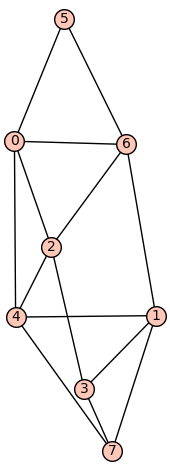

In [17]:
plot(D)

In [18]:
D.is_hamiltonian()

True

#### Примеры: Проверка учебных заданий

In [19]:
# Пусть дана произвольная плоскость
eq_plane = gen_plane()
eq_plane

2*x + 2*y + z + 1

In [20]:
# Принадлежит ли точка M плоскости?
M = (1, 2, 3)

In [21]:
vars_list = var('x,y,z')
subs_M = dict(zip(vars_list, M))
subs_M

{x: 1, y: 2, z: 3}

In [22]:
if eq_plane.subs(subs_M) == 0:
    print('Да')
else:
    print('Нет')

Нет


#### Примеры: Проверка учебных заданий - 2

In [23]:
# Ответы для проверки можно брать с формы на вашем сайте

# пусть input_str получено с формы (и хорошенько проверено)
input_str = 'M = (2,1,0)'


In [24]:
exec(input_str)
M

(2, 1, 0)